In [1]:
import pandas as pd
df = pd.read_csv("cleaned_dataset.csv")

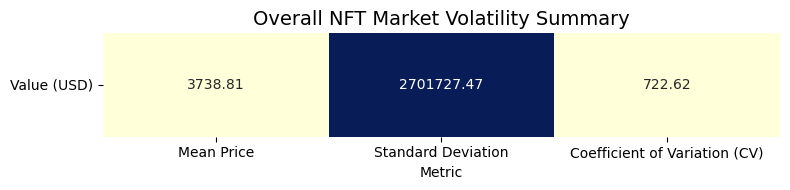

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Overall volatility metrics
mean_price = df["usd_price"].mean()
std_price = df["usd_price"].std()
cv_price = std_price / mean_price  # Coefficient of Variation

# Convert to DataFrame for display
volatility_summary = pd.DataFrame({
    "Metric": ["Mean Price", "Standard Deviation", "Coefficient of Variation (CV)"],
    "Value (USD)": [mean_price, std_price, cv_price]
})

# Set display format for floating point numbers in all DataFrames
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualize the table using a heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(volatility_summary.set_index("Metric").T, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title("Overall NFT Market Volatility Summary", fontsize=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




C:\Users\zehra\AppData\Local\Temp\ipykernel_19856\142844941.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_stats = df.resample('M', on='sales_datetime')['usd_price'].agg(['mean', 'std', 'count']).reset_index()


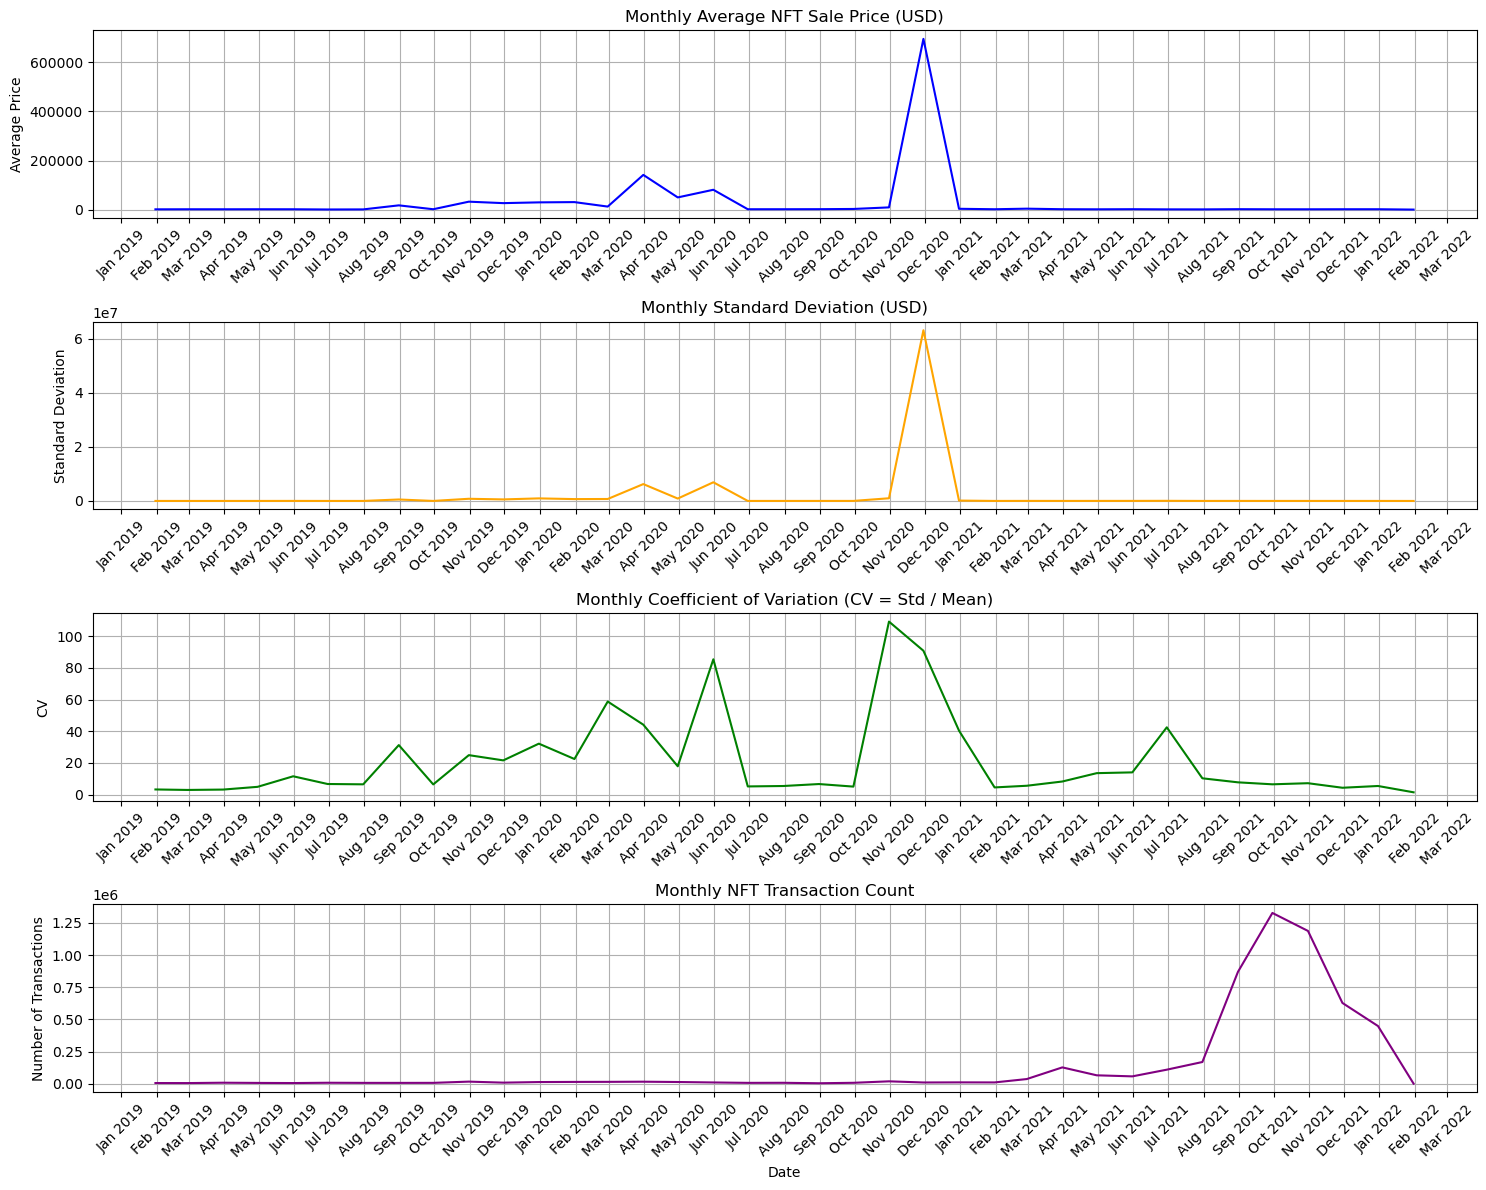

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Convert 'sales_datetime' column to datetime format
df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])

# Monthly statistics
monthly_stats = df.resample('M', on='sales_datetime')['usd_price'].agg(['mean', 'std', 'count']).reset_index()
monthly_stats['cv'] = monthly_stats['std'] / monthly_stats['mean']  # Coefficient of Variation

plt.figure(figsize=(15, 12))

# Monthly Average Price
plt.subplot(4, 1, 1)
plt.plot(monthly_stats['sales_datetime'], monthly_stats['mean'], color='blue')
plt.title('Monthly Average NFT Sale Price (USD)')
plt.ylabel('Average Price')
plt.grid(True)

# Monthly Standard Deviation
plt.subplot(4, 1, 2)
plt.plot(monthly_stats['sales_datetime'], monthly_stats['std'], color='orange')
plt.title('Monthly Standard Deviation (USD)')
plt.ylabel('Standard Deviation')
plt.grid(True)

# Monthly Coefficient of Variation
plt.subplot(4, 1, 3)
plt.plot(monthly_stats['sales_datetime'], monthly_stats['cv'], color='green')
plt.title('Monthly Coefficient of Variation (CV = Std / Mean)')
plt.ylabel('CV')
plt.grid(True)

# Monthly Transaction Count
plt.subplot(4, 1, 4)
plt.plot(monthly_stats['sales_datetime'], monthly_stats['count'], color='purple')
plt.title('Monthly NFT Transaction Count')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)

# Format x-axis for all subplots to show month-year
for ax in plt.gcf().axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()


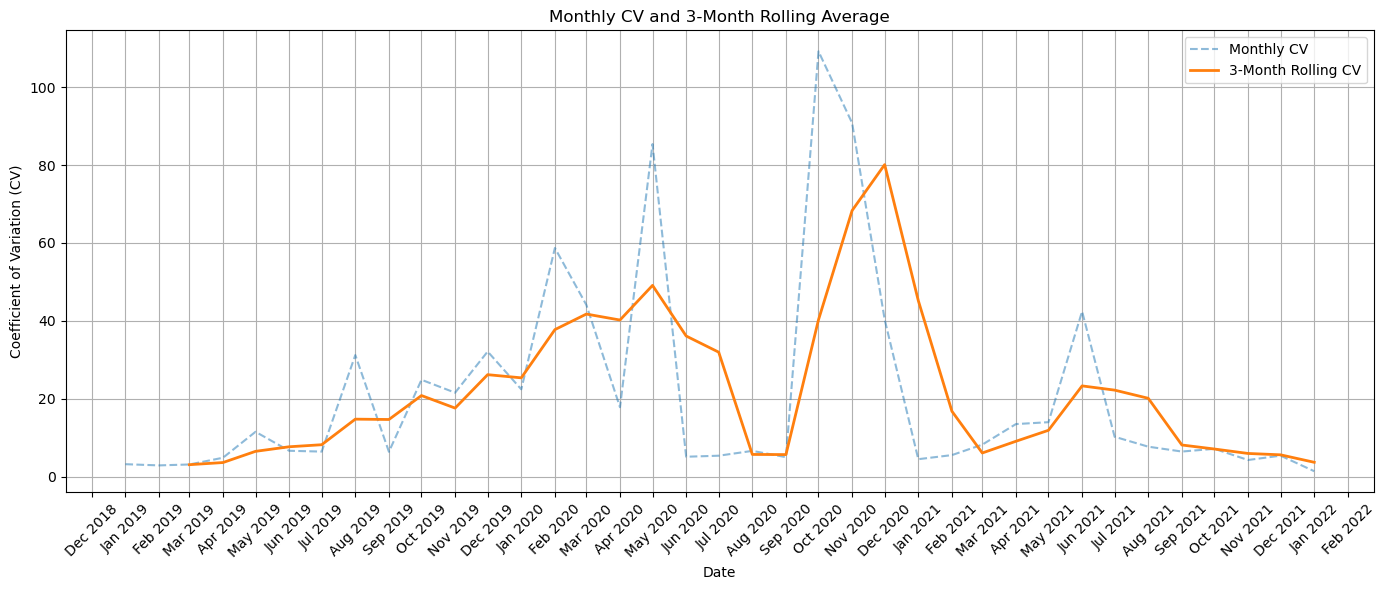

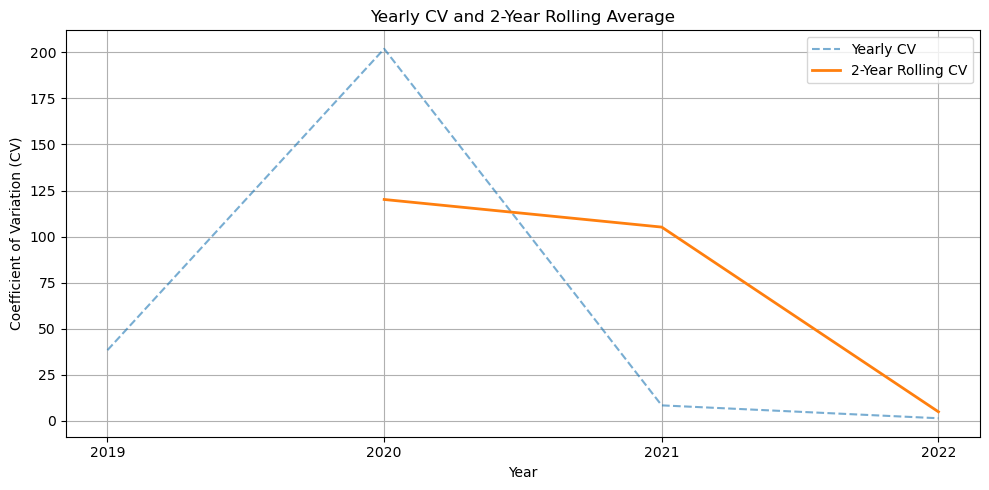

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Grouping by month
monthly_stats = df.groupby(df['sales_datetime'].dt.to_period('M'))['usd_price'].agg(['mean', 'std']).reset_index()
monthly_stats['cv'] = monthly_stats['std'] / monthly_stats['mean']
monthly_stats['rolling_cv_3'] = monthly_stats['cv'].rolling(window=3).mean()

# Grouping by year
yearly_stats = df.groupby(df['sales_datetime'].dt.to_period('Y'))['usd_price'].agg(['mean', 'std']).reset_index()
yearly_stats['cv'] = yearly_stats['std'] / yearly_stats['mean']
yearly_stats['rolling_cv_2'] = yearly_stats['cv'].rolling(window=2).mean()

# Convert period to datetime
monthly_stats['date'] = monthly_stats['sales_datetime'].dt.to_timestamp()
yearly_stats['date'] = yearly_stats['sales_datetime'].dt.to_timestamp()

# === Plot 1: Monthly CV and 3-Month Rolling CV ===
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(monthly_stats['date'], monthly_stats['cv'], label='Monthly CV', alpha=0.5, linestyle='--')
ax1.plot(monthly_stats['date'], monthly_stats['rolling_cv_3'], label='3-Month Rolling CV', linewidth=2)

ax1.set_title('Monthly CV and 3-Month Rolling Average')
ax1.set_xlabel('Date')
ax1.set_ylabel('Coefficient of Variation (CV)')
ax1.legend()
ax1.grid(True)

# X-axis formatting for months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Plot 2: Yearly CV and 2-Year Rolling CV ===
fig, ax2 = plt.subplots(figsize=(10, 5))
ax2.plot(yearly_stats['date'], yearly_stats['cv'], label='Yearly CV', alpha=0.6, linestyle='--')
ax2.plot(yearly_stats['date'], yearly_stats['rolling_cv_2'], label='2-Year Rolling CV', linewidth=2)

ax2.set_title('Yearly CV and 2-Year Rolling Average')
ax2.set_xlabel('Year')
ax2.set_ylabel('Coefficient of Variation (CV)')
ax2.legend()
ax2.grid(True)

# X-axis formatting for years
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
